In [1]:
#set up environment

In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [4]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
#upload dataset to colab

from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India.csv


In [11]:
#load dataset in to a dataframe

import io


In [17]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io


Saving IMDb Movies India.csv to IMDb Movies India (3).csv


In [24]:
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')


In [25]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [28]:
print(data.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [29]:
print(data.tail())

                      Name    Year Duration          Genre  Rating Votes  \
15504  Zulm Ko Jala Doonga  (1988)      NaN         Action     4.6    11   
15505                Zulmi  (1999)  129 min  Action, Drama     4.5   655   
15506            Zulmi Raj  (2005)      NaN         Action     NaN   NaN   
15507        Zulmi Shikari  (1988)      NaN         Action     NaN   NaN   
15508         Zulm-O-Sitam  (1998)  130 min  Action, Drama     6.2    20   

            Director           Actor 1         Actor 2        Actor 3  
15504  Mahendra Shah  Naseeruddin Shah   Sumeet Saigal  Suparna Anand  
15505     Kuku Kohli      Akshay Kumar  Twinkle Khanna    Aruna Irani  
15506     Kiran Thej   Sangeeta Tiwari             NaN            NaN  
15507            NaN               NaN             NaN            NaN  
15508   K.C. Bokadia        Dharmendra      Jaya Prada    Arjun Sarja  


In [31]:
#handle missing values

data.isnull().sum()
data.fillna(data.mode().iloc[0], inplace=True)


In [33]:
#convert to numerical values

le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
data['Director'] = le.fit_transform(data['Director'])
data['Actor 1'] = le.fit_transform(data['Actor 1'])
data['Actor 2'] = le.fit_transform(data['Actor 2'])
data['Actor 3'] = le.fit_transform(data['Actor 3'])


In [35]:
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = data[features]
y = data['Rating']


In [36]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
X_test

,Genre,Director,Actor 1,Actor 2,Actor 3
11115,331,3243,636,3402,2847
2921,299,3771,2510,3421,4726
3463,299,19,636,3402,2847
2495,299,1061,847,921,4457
15263,479,2034,636,3402,2847
...,...,...,...,...,...
6434,40,5091,3560,944,4347
14615,299,2928,1846,3520,2376
12250,299,5022,3263,3079,820
4139,18,1059,1385,2619,4226


In [38]:
#model train

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [39]:
#make prediction

y_pred = model.predict(X_test)


In [40]:
#evaluate

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 0.946408293966627


In [41]:
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

R^2 Score: 0.05630085034640231


**predict on new data**

In [46]:
all_genres = data['Genre'].unique().tolist() + ['Drama']
all_directors = data['Director'].unique().tolist() + ['Christopher Nolan']
all_actors = data['Actor 1'].unique().tolist() + ['Leonardo DiCaprio']


In [47]:
le_genre = LabelEncoder()
le_genre.fit(all_genres)

le_director = LabelEncoder()
le_director.fit(all_directors)

le_actors = LabelEncoder()
le_actors.fit(all_actors)

LabelEncoder()

In [48]:
new_data = pd.DataFrame({
    'Genre': [le_genre.transform(['Drama'])[0]],
    'Director': [le_director.transform(['Christopher Nolan'])[0]],
    'Actor 1': [le_actors.transform(['Leonardo DiCaprio'])[0]],
    'Actor 2': [le_actors.transform(['Leonardo DiCaprio'])[0]],
    'Actor 3': [le_actors.transform(['Leonardo DiCaprio'])[0]]
})

new_data

,Genre,Director,Actor 1,Actor 2,Actor 3
0,485,5938,4718,4718,4718


**make prediction on the New data**

In [49]:
new_rating_prediction = model.predict(new_data)
print(f'Predicted Rating: {new_rating_prediction[0]}')


Predicted Rating: 5.600999999999999


**Visualize Results**

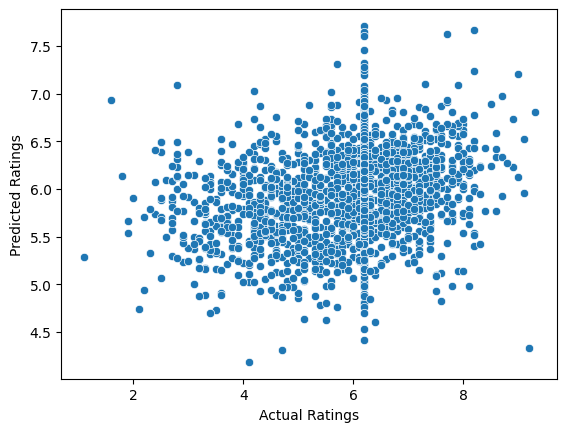

In [50]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()
